# Applied Data Science Capstone Project

This notebook will be mainly used for the Capstone Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
import seaborn as sns

## Week 1 Submission

In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


## Week 3 Submission

### Introduction

To determine the severity of any accident that may happen given certain attributes like weather, collision type, person count etc

In [3]:
df = pd.read_csv("Data-Collisions.csv")

/Users/jonathankoh/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
pd.set_option('display.max_columns',None)

In [5]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


### Pre-processing

#### Convert to date time object and see if day of week or time of day has any effect on severity

In [6]:
df['INCDATE'] = pd.to_datetime(df['INCDATE'])
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df[1:2]

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006-12-20 00:00:00+00:00,2006-12-20 18:55:00,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N


In [7]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [8]:
df['DAYOFWEEK']=df['INCDATE'].dt.dayofweek
df['TIMEOFDAY']=(df['INCDTTM'].dt.hour % 24+4)//4


In [9]:
df['TIMEOFDAY'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)

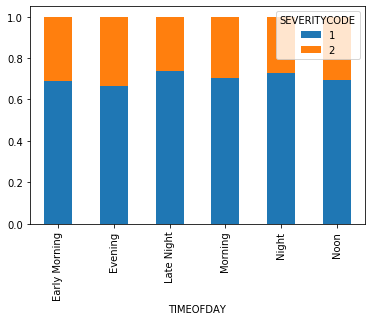

In [10]:
df_TIMEOFDAY = df.groupby('TIMEOFDAY')['SEVERITYCODE'].value_counts().unstack()
df_TIMEOFDAY_pct = df_TIMEOFDAY.divide(df_TIMEOFDAY.sum(axis=1), axis=0)
df_TIMEOFDAY_pct.plot(kind="bar", stacked=True)

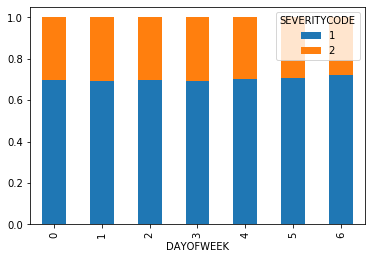

In [11]:
df_DAYOFWEEK = df.groupby('DAYOFWEEK')['SEVERITYCODE'].value_counts().unstack()
df_DAYOFWEEK_pct = df_DAYOFWEEK.divide(df_DAYOFWEEK.sum(axis=1), axis=0)
df_DAYOFWEEK_pct.plot(kind="bar", stacked=True)

#### Explore relationship between severity and collision type

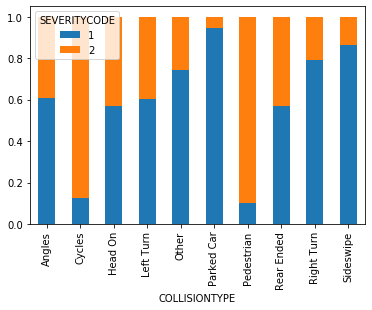

In [12]:
df_COLLISIONTYPE = df.groupby('COLLISIONTYPE')['SEVERITYCODE'].value_counts().unstack()
df_COLLISIONTYPE_pct = df_COLLISIONTYPE.divide(df_COLLISIONTYPE.sum(axis=1), axis=0)
df_COLLISIONTYPE_pct.plot(kind="bar",stacked=True)

In [13]:
df['COLLISIONTYPE'].value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

#### Explore relationship between severity and accident type

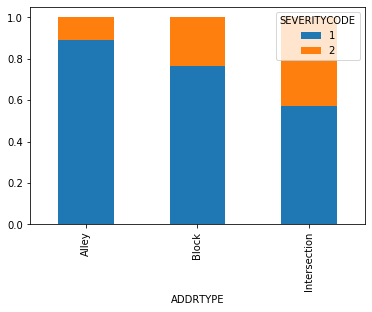

In [14]:
df_ADDRTYPE = df.groupby('ADDRTYPE')['SEVERITYCODE'].value_counts().unstack()
df_ADDRTYPE_pct = df_ADDRTYPE.divide(df_ADDRTYPE.sum(axis=1), axis=0)
df_ADDRTYPE_pct.plot(kind="bar",stacked=True)

#### Explore relationship between severity and person count

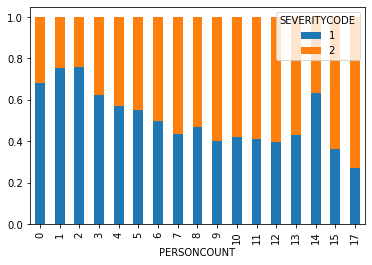

In [83]:
df_PERSONCOUNT = df.groupby('PERSONCOUNT')['SEVERITYCODE'].value_counts().unstack()
df_PERSONCOUNT_pct = df_PERSONCOUNT.divide(df_PERSONCOUNT.sum(axis=1), axis=0)
df_PERSONCOUNT_pct.plot(kind="bar",stacked=True)

In [16]:
df['PERSONCOUNT'].value_counts()

2     114231
3      35553
4      14660
1      13154
5       6584
0       5544
6       2702
7       1131
8        533
9        216
10       128
11        56
12        33
13        21
14        19
15        11
17        11
16         8
44         6
18         6
20         6
25         6
19         5
26         4
22         4
27         3
28         3
29         3
47         3
32         3
34         3
37         3
23         2
21         2
24         2
30         2
36         2
57         1
31         1
35         1
39         1
41         1
43         1
48         1
53         1
54         1
81         1
Name: PERSONCOUNT, dtype: int64

In [17]:
pcounts = df['PERSONCOUNT'].value_counts()
df = df.loc[df['PERSONCOUNT'].isin(pcounts.index[pcounts > 10])]
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,DAYOFWEEK,TIMEOFDAY
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013-03-27 00:00:00+00:00,2013-03-27 14:54:00,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N,2,Noon
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006-12-20 00:00:00+00:00,2006-12-20 18:55:00,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N,2,Evening
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004-11-18 00:00:00+00:00,2004-11-18 10:20:00,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N,3,Morning
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013-03-29 00:00:00+00:00,2013-03-29 09:26:00,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N,4,Morning
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004-01-28 00:00:00+00:00,2004-01-28 08:04:00,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N,2,Morning


In [18]:
df['PERSONCOUNT'].value_counts()

2     114231
3      35553
4      14660
1      13154
5       6584
0       5544
6       2702
7       1131
8        533
9        216
10       128
11        56
12        33
13        21
14        19
15        11
17        11
Name: PERSONCOUNT, dtype: int64

#### Explore relationship between severity and PEDCOUNT

In [19]:
df['PEDCOUNT'].value_counts()

0    187649
1      6684
2       226
3        22
4         4
6         1
5         1
Name: PEDCOUNT, dtype: int64

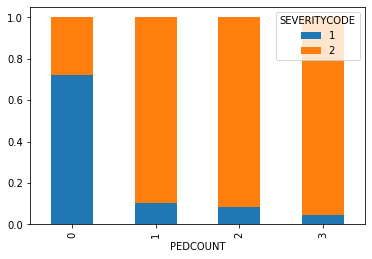

In [84]:
df_PEDCOUNT = df.groupby('PEDCOUNT')['SEVERITYCODE'].value_counts().unstack()
df_PEDCOUNT_pct = df_PEDCOUNT.divide(df_PEDCOUNT.sum(axis=1), axis=0)
df_PEDCOUNT_pct.plot(kind="bar",stacked=True)

In [21]:
pedcounts = df['PEDCOUNT'].value_counts()
df = df.loc[df['PEDCOUNT'].isin(pedcounts.index[pedcounts > 10])]
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,DAYOFWEEK,TIMEOFDAY
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013-03-27 00:00:00+00:00,2013-03-27 14:54:00,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N,2,Noon
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006-12-20 00:00:00+00:00,2006-12-20 18:55:00,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N,2,Evening
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004-11-18 00:00:00+00:00,2004-11-18 10:20:00,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N,3,Morning
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013-03-29 00:00:00+00:00,2013-03-29 09:26:00,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N,4,Morning
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004-01-28 00:00:00+00:00,2004-01-28 08:04:00,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N,2,Morning


#### Explore relationship between severity and collision description (which is tied to colcode)

In [22]:
df['SDOT_COLDESC'].value_counts()

MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE          85159
MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END                    54272
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE          9924
NOT ENOUGH INFORMATION / NOT APPLICABLE                          9787
MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT                    8853
MOTOR VEHCILE STRUCK PEDESTRIAN                                  6513
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE           5852
MOTOR VEHICLE STRUCK OBJECT IN ROAD                              4740
MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE            3104
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE         1604
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE          1440
PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT ANGLE             1312
MOTOR VEHICLE OVERTURNED IN ROAD                                  479
MOTOR VEHICLE STRUCK PEDALCYCLIST, REAR END                       181
PEDALCYCLIST STRUCK 

In [23]:
scounts = df['SDOT_COLDESC'].value_counts()
df = df.loc[df['SDOT_COLDESC'].isin(scounts.index[scounts > 100])]
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,DAYOFWEEK,TIMEOFDAY
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013-03-27 00:00:00+00:00,2013-03-27 14:54:00,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N,2,Noon
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006-12-20 00:00:00+00:00,2006-12-20 18:55:00,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N,2,Evening
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004-11-18 00:00:00+00:00,2004-11-18 10:20:00,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N,3,Morning
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013-03-29 00:00:00+00:00,2013-03-29 09:26:00,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N,4,Morning
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004-01-28 00:00:00+00:00,2004-01-28 08:04:00,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N,2,Morning


In [24]:
df['SDOT_COLDESC'].value_counts()

MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE        85159
MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END                  54272
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE        9924
NOT ENOUGH INFORMATION / NOT APPLICABLE                        9787
MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT                  8853
MOTOR VEHCILE STRUCK PEDESTRIAN                                6513
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE         5852
MOTOR VEHICLE STRUCK OBJECT IN ROAD                            4740
MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE          3104
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE       1604
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE        1440
PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT ANGLE           1312
MOTOR VEHICLE OVERTURNED IN ROAD                                479
MOTOR VEHICLE STRUCK PEDALCYCLIST, REAR END                     181
PEDALCYCLIST STRUCK MOTOR VEHICLE LEFT SIDE SIDE

#### Upsample to remove imbalance for severity code 1 and severity code 2

In [25]:
df['SEVERITYCODE'].value_counts()

1    136247
2     57893
Name: SEVERITYCODE, dtype: int64

In [26]:
# Separate majority and minority classes
df_injury = df[df.SEVERITYCODE==2]
df_property = df[df.SEVERITYCODE==1]

# Upsample minority class
df_injury_upsampled = resample(df_injury, 
                                 replace=True,     # sample with replacement
                                 n_samples=136485,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_property, df_injury_upsampled])
 
# Display new class counts
df_upsampled.SEVERITYCODE.value_counts()

2    136485
1    136247
Name: SEVERITYCODE, dtype: int64

In [27]:
df_upsampled.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,DAYOFWEEK,TIMEOFDAY
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006-12-20 00:00:00+00:00,2006-12-20 18:55:00,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N,2,Evening
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004-11-18 00:00:00+00:00,2004-11-18 10:20:00,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N,3,Morning
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013-03-29 00:00:00+00:00,2013-03-29 09:26:00,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N,4,Morning
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,24TH AVE NW AND NW 85TH ST,,NaN,1,Property Damage Only Collision,Angles,2,0,0,2,2019-04-20 00:00:00+00:00,2019-04-20 17:42:00,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N,5,Evening
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,DENNY WAY AND WESTLAKE AVE,NaN,NaN,1,Property Damage Only Collision,Angles,2,0,0,2,2008-12-09 00:00:00+00:00,2008-12-09 00:00:00,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,8344002.0,NaN,10,Entering at angle,0,0,N,1,Late Night


#### Remove all the nan and replace with correct values

In [28]:
df_new = df_upsampled[['SEVERITYDESC','ADDRTYPE','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT', 'PEDCYLCOUNT', \
                  'VEHCOUNT', 'TIMEOFDAY', 'JUNCTIONTYPE', 'SDOT_COLDESC',\
                  'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',\
                  'PEDROWNOTGRNT', 'SPEEDING', 'HITPARKEDCAR']]

In [29]:
df_new.head()

,SEVERITYDESC,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,TIMEOFDAY,JUNCTIONTYPE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
1,Property Damage Only Collision,Block,Sideswipe,2,0,0,2,Evening,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,N
2,Property Damage Only Collision,Block,Parked Car,4,0,0,3,Morning,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,NaN,N
3,Property Damage Only Collision,Block,Other,3,0,0,3,Morning,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,N
5,Property Damage Only Collision,Intersection,Angles,2,0,0,2,Evening,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,N
6,Property Damage Only Collision,Intersection,Angles,2,0,0,2,Late Night,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,NaN,N


In [30]:
df_new['INATTENTIONIND'].fillna('N',inplace=True)

/Users/jonathankoh/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [31]:
df_new['PEDROWNOTGRNT'].fillna('N',inplace=True)

In [32]:
df_new['SPEEDING'].fillna('N',inplace=True)

In [33]:
df_new['HITPARKEDCAR'].unique()

array(['N', 'Y'], dtype=object)

In [34]:
df_new.isnull().sum()

SEVERITYDESC         0
ADDRTYPE          2227
COLLISIONTYPE     6307
PERSONCOUNT          0
PEDCOUNT             0
PEDCYLCOUNT          0
VEHCOUNT             0
TIMEOFDAY            0
JUNCTIONTYPE      6924
SDOT_COLDESC         0
INATTENTIONIND       0
UNDERINFL         6268
WEATHER           6543
ROADCOND          6440
LIGHTCOND         6641
PEDROWNOTGRNT        0
SPEEDING             0
HITPARKEDCAR         0
dtype: int64

In [35]:
df_new.dropna(inplace=True)

/Users/jonathankoh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
df_new.shape

(258778, 18)

#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame

In [37]:
df_new.columns

Index(['SEVERITYDESC', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'TIMEOFDAY', 'JUNCTIONTYPE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SPEEDING', 'HITPARKEDCAR'],
      dtype='object')

In [38]:
df_new['INATTENTIONIND'].replace(to_replace=['Y','N'], value=[1,0],inplace=True)
df_new['UNDERINFL'].replace(to_replace=['Y','N'], value=[1,0],inplace=True)
df_new['PEDROWNOTGRNT'].replace(to_replace=['Y','N'], value=[1,0],inplace=True)
df_new['SPEEDING'].replace(to_replace=['Y','N'], value=[1,0],inplace=True)
df_new['HITPARKEDCAR'].replace(to_replace=['Y','N'], value=[1,0],inplace=True)


/Users/jonathankoh/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [39]:
df_new['ADDRTYPE'] = 'ADDRTYPE_' + df_new['ADDRTYPE']
df_new['COLLISIONTYPE'] = 'COLLISIONTYPE_' + df_new['COLLISIONTYPE']
df_new['TIMEOFDAY'] = 'TIMEOFDAY_' + df_new['TIMEOFDAY']
df_new['JUNCTIONTYPE'] = 'JUNCTIONTYPE_' + df_new['JUNCTIONTYPE']
df_new['SDOT_COLDESC'] = 'SDOT_COLDESC_' + df_new['SDOT_COLDESC']
df_new['WEATHER'] = 'WEATHER_' + df_new['WEATHER']
df_new['ROADCOND'] = 'ROADCOND_' + df_new['ROADCOND']
df_new['LIGHTCOND'] = 'LIGHTCOND_' + df_new['LIGHTCOND']

/Users/jonathankoh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/jonathankoh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jonathankoh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [40]:
Feature = df_new[['ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'TIMEOFDAY', 'JUNCTIONTYPE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SPEEDING', 'HITPARKEDCAR']]
Feature.head()

,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,TIMEOFDAY,JUNCTIONTYPE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
1,ADDRTYPE_Block,COLLISIONTYPE_Sideswipe,2,0,0,2,TIMEOFDAY_Evening,JUNCTIONTYPE_Mid-Block (not related to interse...,SDOT_COLDESC_MOTOR VEHICLE STRUCK MOTOR VEHICL...,0,0,WEATHER_Raining,ROADCOND_Wet,LIGHTCOND_Dark - Street Lights On,0,0,0
2,ADDRTYPE_Block,COLLISIONTYPE_Parked Car,4,0,0,3,TIMEOFDAY_Morning,JUNCTIONTYPE_Mid-Block (not related to interse...,SDOT_COLDESC_MOTOR VEHICLE STRUCK MOTOR VEHICL...,0,0,WEATHER_Overcast,ROADCOND_Dry,LIGHTCOND_Daylight,0,0,0
3,ADDRTYPE_Block,COLLISIONTYPE_Other,3,0,0,3,TIMEOFDAY_Morning,JUNCTIONTYPE_Mid-Block (not related to interse...,SDOT_COLDESC_MOTOR VEHICLE STRUCK MOTOR VEHICL...,0,0,WEATHER_Clear,ROADCOND_Dry,LIGHTCOND_Daylight,0,0,0
5,ADDRTYPE_Intersection,COLLISIONTYPE_Angles,2,0,0,2,TIMEOFDAY_Evening,JUNCTIONTYPE_At Intersection (intersection rel...,SDOT_COLDESC_MOTOR VEHICLE STRUCK MOTOR VEHICL...,0,0,WEATHER_Clear,ROADCOND_Dry,LIGHTCOND_Daylight,0,0,0
6,ADDRTYPE_Intersection,COLLISIONTYPE_Angles,2,0,0,2,TIMEOFDAY_Late Night,JUNCTIONTYPE_At Intersection (intersection rel...,SDOT_COLDESC_MOTOR VEHICLE STRUCK MOTOR VEHICL...,0,0,WEATHER_Raining,ROADCOND_Wet,LIGHTCOND_Daylight,0,0,0


In [41]:
Feature = pd.concat([Feature,pd.get_dummies(df_new['ADDRTYPE'])], axis=1)
Feature.drop(['ADDRTYPE'], axis = 1,inplace=True)

Feature = pd.concat([Feature,pd.get_dummies(df_new['COLLISIONTYPE'])], axis=1)
Feature.drop(['COLLISIONTYPE'], axis = 1,inplace=True)

Feature = pd.concat([Feature,pd.get_dummies(df_new['TIMEOFDAY'])], axis=1)
Feature.drop(['TIMEOFDAY'], axis = 1,inplace=True)

Feature = pd.concat([Feature,pd.get_dummies(df_new['JUNCTIONTYPE'])], axis=1)
Feature.drop(['JUNCTIONTYPE'], axis = 1,inplace=True)

Feature = pd.concat([Feature,pd.get_dummies(df_new['SDOT_COLDESC'])], axis=1)
Feature.drop(['SDOT_COLDESC'], axis = 1,inplace=True)

Feature = pd.concat([Feature,pd.get_dummies(df_new['WEATHER'])], axis=1)
Feature.drop(['WEATHER'], axis = 1,inplace=True)

Feature = pd.concat([Feature,pd.get_dummies(df_new['ROADCOND'])], axis=1)
Feature.drop(['ROADCOND'], axis = 1,inplace=True)

Feature = pd.concat([Feature,pd.get_dummies(df_new['LIGHTCOND'])], axis=1)
Feature.drop(['LIGHTCOND'], axis = 1,inplace=True)


In [42]:
df_new['SEVERITYDESC'].unique()

array(['Property Damage Only Collision', 'Injury Collision'], dtype=object)

Using df_upsampled as the Data-Collisions.csv data read by pandas, declare the following variables: 
- X as the Feature Matrix (data of df_upsampled)
- y as the response vector (target)

In [43]:
X = Feature
X[0:5]

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,COLLISIONTYPE_Right Turn,COLLISIONTYPE_Sideswipe,TIMEOFDAY_Early Morning,TIMEOFDAY_Evening,TIMEOFDAY_Late Night,TIMEOFDAY_Morning,TIMEOFDAY_Night,TIMEOFDAY_Noon,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,JUNCTIONTYPE_Unknown,SDOT_COLDESC_DRIVERLESS VEHICLE RAN OFF ROAD - HIT FIXED OBJECT,SDOT_COLDESC_DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE FRONT END AT ANGLE,SDOT_COLDESC_MOTOR VEHCILE STRUCK PEDESTRIAN,SDOT_COLDESC_MOTOR VEHICLE OVERTURNED IN ROAD,SDOT_COLDESC_MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT,SDOT_COLDESC_MOTOR VEHICLE RAN OFF ROAD - NO COLLISION,"SDOT_COLDESC_MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE","SDOT_COLDESC_MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE","SDOT_COLDESC_MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE","SDOT_COLDESC_MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END","SDOT_COLDESC_MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE","SDOT_COLDESC_MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE",SDOT_COLDESC_MOTOR VEHICLE STRUCK OBJECT IN ROAD,"SDOT_COLDESC_MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE","SDOT_COLDESC_MOTOR VEHICLE STRUCK PEDALCYCLIST, LEFT SIDE SIDESWIPE","SDOT_COLDESC_MOTOR VEHICLE STRUCK PEDALCYCLIST, REAR END",SDOT_COLDESC_MOTOR VEHICLE STRUCK TRAIN,SDOT_COLDESC_NOT ENOUGH INFORMATION / NOT APPLICABLE,SDOT_COLDESC_PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT ANGLE,SDOT_COLDESC_PEDALCYCLIST STRUCK MOTOR VEHICLE LEFT SIDE SIDESWIPE,SDOT_COLDESC_PEDALCYCLIST STRUCK MOTOR VEHICLE REAR END,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,WEATHER_Unknown,ROADCOND_Dry,ROADCOND_Ice,ROADCOND_Oil,ROADCOND_Other,ROADCOND_Sand/Mud/Dirt,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Unknown,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
1,2,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2,4,0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,3,0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,2,0,0,2,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,2,0,0,2,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [44]:
y = df_new["SEVERITYDESC"]
y

1         Property Damage Only Collision
2         Property Damage Only Collision
3         Property Damage Only Collision
5         Property Damage Only Collision
6         Property Damage Only Collision
                       ...              
61328                   Injury Collision
159949                  Injury Collision
156711                  Injury Collision
156557                  Injury Collision
120410                  Injury Collision
Name: SEVERITYDESC, Length: 258778, dtype: object

### Setting up the Decision Tree

In [45]:
from sklearn.model_selection import train_test_split

Now train_test_split will return 4 different parameters. We will name them:
- X_trainset, X_testset, y_trainset, y_testset 

The train_test_split will need the parameters: 
- X, y, test_size=0.3, and random_state=3. 

The X and y are the arrays required before the split, the test_size represents the ratio of the testing dataset, and the random_state ensures that we obtain the same splits

In [46]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

### Modeling

In [68]:
severityTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
severityTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [69]:
severityTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Prediction

In [70]:
predTree = severityTree.predict(X_testset)

### Evaluation

In [71]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.68516371692815


In [72]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [73]:
predTree_testset = severityTree.predict(X_testset)
dtree_jaccard=jaccard_similarity_score(y_testset, predTree_testset)
print(dtree_jaccard)

/Users/jonathankoh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.68516371692815


In [74]:
dtree_f1score=f1_score(y_testset, predTree_testset, average='weighted')
print(dtree_f1score)

0.6653808163743623


### Confusion matrix

In [75]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_testset, predTree_testset, labels=['Property Damage Only Collision','Injury Collision']))

[[16637 21102]
 [ 3340 36555]]


Confusion matrix, without normalization
[[16637 21102]
 [ 3340 36555]]


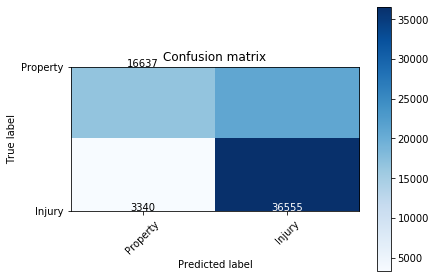

In [76]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_testset, predTree_testset, labels=['Property Damage Only Collision','Injury Collision'])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Property','Injury'],normalize= False,  title='Confusion matrix')

In [77]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [78]:
X

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,COLLISIONTYPE_Rear Ended,COLLISIONTYPE_Right Turn,COLLISIONTYPE_Sideswipe,TIMEOFDAY_Early Morning,TIMEOFDAY_Evening,TIMEOFDAY_Late Night,TIMEOFDAY_Morning,TIMEOFDAY_Night,TIMEOFDAY_Noon,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,JUNCTIONTYPE_Unknown,SDOT_COLDESC_DRIVERLESS VEHICLE RAN OFF ROAD - HIT FIXED OBJECT,SDOT_COLDESC_DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE FRONT END AT ANGLE,SDOT_COLDESC_MOTOR VEHCILE STRUCK PEDESTRIAN,SDOT_COLDESC_MOTOR VEHICLE OVERTURNED IN ROAD,SDOT_COLDESC_MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT,SDOT_COLDESC_MOTOR VEHICLE RAN OFF ROAD - NO COLLISION,"SDOT_COLDESC_MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE","SDOT_COLDESC_MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE","SDOT_COLDESC_MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE","SDOT_COLDESC_MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END","SDOT_COLDESC_MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE","SDOT_COLDESC_MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE",SDOT_COLDESC_MOTOR VEHICLE STRUCK OBJECT IN ROAD,"SDOT_COLDESC_MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE","SDOT_COLDESC_MOTOR VEHICLE STRUCK PEDALCYCLIST, LEFT SIDE SIDESWIPE","SDOT_COLDESC_MOTOR VEHICLE STRUCK PEDALCYCLIST, REAR END",SDOT_COLDESC_MOTOR VEHICLE STRUCK TRAIN,SDOT_COLDESC_NOT ENOUGH INFORMATION / NOT APPLICABLE,SDOT_COLDESC_PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT ANGLE,SDOT_COLDESC_PEDALCYCLIST STRUCK MOTOR VEHICLE LEFT SIDE SIDESWIPE,SDOT_COLDESC_PEDALCYCLIST STRUCK MOTOR VEHICLE REAR END,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,WEATHER_Unknown,ROADCOND_Dry,ROADCOND_Ice,ROADCOND_Oil,ROADCOND_Other,ROADCOND_Sand/Mud/Dirt,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Unknown,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
1,2,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2,4,0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,3,0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,2,0,0,2,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,2,0,0,2,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61328,2,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

In [79]:
X.columns

Index(['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INATTENTIONIND',
       'UNDERINFL', 'PEDROWNOTGRNT', 'SPEEDING', 'HITPARKEDCAR',
       'ADDRTYPE_Alley', 'ADDRTYPE_Block', 'ADDRTYPE_Intersection',
       'COLLISIONTYPE_Angles', 'COLLISIONTYPE_Cycles', 'COLLISIONTYPE_Head On',
       'COLLISIONTYPE_Left Turn', 'COLLISIONTYPE_Other',
       'COLLISIONTYPE_Parked Car', 'COLLISIONTYPE_Pedestrian',
       'COLLISIONTYPE_Rear Ended', 'COLLISIONTYPE_Right Turn',
       'COLLISIONTYPE_Sideswipe', 'TIMEOFDAY_Early Morning',
       'TIMEOFDAY_Evening', 'TIMEOFDAY_Late Night', 'TIMEOFDAY_Morning',
       'TIMEOFDAY_Night', 'TIMEOFDAY_Noon',
       'JUNCTIONTYPE_At Intersection (but not related to intersection)',
       'JUNCTIONTYPE_At Intersection (intersection related)',
       'JUNCTIONTYPE_Driveway Junction',
       'JUNCTIONTYPE_Mid-Block (but intersection related)',
       'JUNCTIONTYPE_Mid-Block (not related to intersection)',
       'JUNCTIONTYPE_Ramp Junction', 'JUNCTIONTY

In [80]:
Feature = pd.DataFrame(data=X, columns=['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INATTENTIONIND',
       'UNDERINFL', 'PEDROWNOTGRNT', 'SPEEDING', 'HITPARKEDCAR',
       'ADDRTYPE_Alley', 'ADDRTYPE_Block', 'ADDRTYPE_Intersection',
       'COLLISIONTYPE_Angles', 'COLLISIONTYPE_Cycles', 'COLLISIONTYPE_Head On',
       'COLLISIONTYPE_Left Turn', 'COLLISIONTYPE_Other',
       'COLLISIONTYPE_Parked Car', 'COLLISIONTYPE_Pedestrian',
       'COLLISIONTYPE_Rear Ended', 'COLLISIONTYPE_Right Turn',
       'COLLISIONTYPE_Sideswipe', 'TIMEOFDAY_Early Morning',
       'TIMEOFDAY_Evening', 'TIMEOFDAY_Late Night', 'TIMEOFDAY_Morning',
       'TIMEOFDAY_Night', 'TIMEOFDAY_Noon',
       'JUNCTIONTYPE_At Intersection (but not related to intersection)',
       'JUNCTIONTYPE_At Intersection (intersection related)',
       'JUNCTIONTYPE_Driveway Junction',
       'JUNCTIONTYPE_Mid-Block (but intersection related)',
       'JUNCTIONTYPE_Mid-Block (not related to intersection)',
       'JUNCTIONTYPE_Ramp Junction', 'JUNCTIONTYPE_Unknown',
       'SDOT_COLDESC_DRIVERLESS VEHICLE RAN OFF ROAD - HIT FIXED OBJECT',
       'SDOT_COLDESC_DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE FRONT END AT ANGLE',
       'SDOT_COLDESC_MOTOR VEHCILE STRUCK PEDESTRIAN',
       'SDOT_COLDESC_MOTOR VEHICLE OVERTURNED IN ROAD',
       'SDOT_COLDESC_MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT',
       'SDOT_COLDESC_MOTOR VEHICLE RAN OFF ROAD - NO COLLISION',
       'SDOT_COLDESC_MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE',
       'SDOT_COLDESC_MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE',
       'SDOT_COLDESC_MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE',
       'SDOT_COLDESC_MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END',
       'SDOT_COLDESC_MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE',
       'SDOT_COLDESC_MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE',
       'SDOT_COLDESC_MOTOR VEHICLE STRUCK OBJECT IN ROAD',
       'SDOT_COLDESC_MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE',
       'SDOT_COLDESC_MOTOR VEHICLE STRUCK PEDALCYCLIST, LEFT SIDE SIDESWIPE',
       'SDOT_COLDESC_MOTOR VEHICLE STRUCK PEDALCYCLIST, REAR END',
       'SDOT_COLDESC_MOTOR VEHICLE STRUCK TRAIN',
       'SDOT_COLDESC_NOT ENOUGH INFORMATION / NOT APPLICABLE',
       'SDOT_COLDESC_PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT ANGLE',
       'SDOT_COLDESC_PEDALCYCLIST STRUCK MOTOR VEHICLE LEFT SIDE SIDESWIPE',
       'SDOT_COLDESC_PEDALCYCLIST STRUCK MOTOR VEHICLE REAR END',
       'WEATHER_Blowing Sand/Dirt', 'WEATHER_Clear', 'WEATHER_Fog/Smog/Smoke',
       'WEATHER_Other', 'WEATHER_Overcast', 'WEATHER_Partly Cloudy',
       'WEATHER_Raining', 'WEATHER_Severe Crosswind',
       'WEATHER_Sleet/Hail/Freezing Rain', 'WEATHER_Snowing',
       'WEATHER_Unknown', 'ROADCOND_Dry', 'ROADCOND_Ice', 'ROADCOND_Oil',
       'ROADCOND_Other', 'ROADCOND_Sand/Mud/Dirt', 'ROADCOND_Snow/Slush',
       'ROADCOND_Standing Water', 'ROADCOND_Unknown', 'ROADCOND_Wet',
       'LIGHTCOND_Dark - No Street Lights',
       'LIGHTCOND_Dark - Street Lights Off',
       'LIGHTCOND_Dark - Street Lights On',
       'LIGHTCOND_Dark - Unknown Lighting', 'LIGHTCOND_Dawn',
       'LIGHTCOND_Daylight', 'LIGHTCOND_Dusk', 'LIGHTCOND_Other',
       'LIGHTCOND_Unknown'])

In [81]:
Feature.shape

(258778, 85)

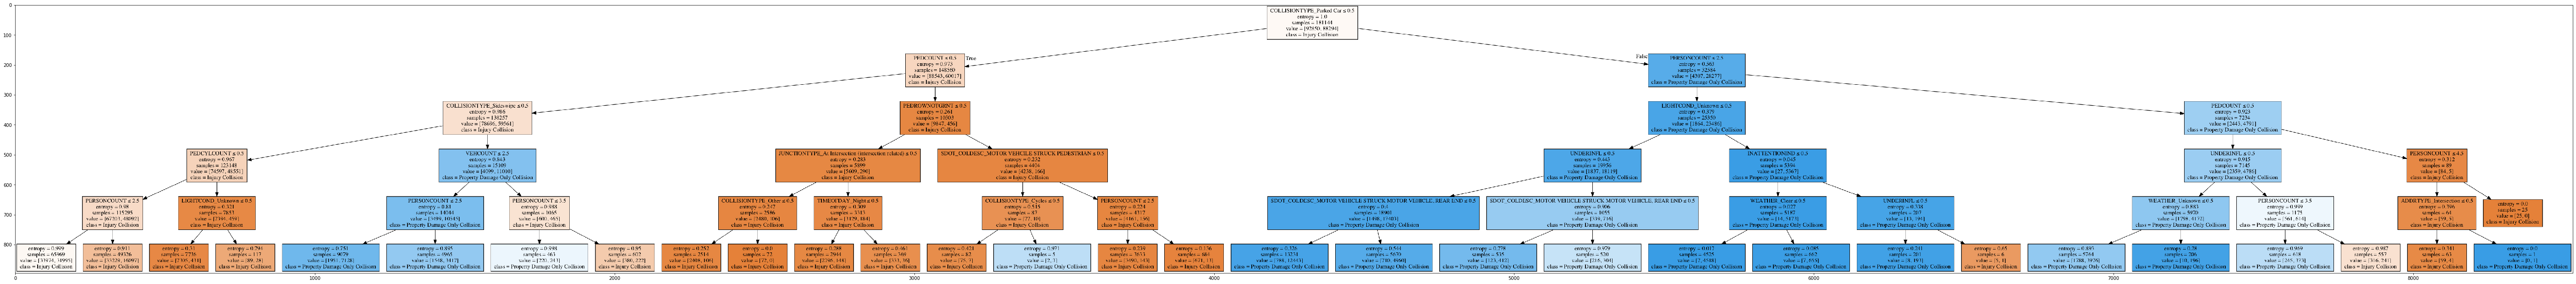

In [82]:
dot_data = StringIO()
filename = "severitytree.png"
featureNames = Feature.columns[0:85]
targetNames = df["SEVERITYDESC"].unique().tolist()
out=tree.export_graphviz(severityTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')